In [185]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

In [186]:
def otsukapur(occorrenze, prob, width, height, t):
    """
    Otsu-Kapur thresholding algorithm.

    Parameters:
        occorrenze (list): List of pixel intensity occurrences.
        prob (list): List of pixel intensity probabilities.
        width (int): Image width.
        height (int): Image height.
        t (int): Current threshold value.

    Returns:
        N_e (float): objective function value to be minimized, in order to get an optimal global threshold value.
    """

    P_t = 0
    S_a = 0
    S_b = 0
    P_a = 0
    P_b = 0
    omega_a = 0
    omega_b = 0
    sigma_a = 0
    sigma_b = 0
    
    for i in range(256):
        prob[i] = occorrenze[i] / (width * height)
        if i <= t:
            P_t += prob[i]
            P_a += prob[i]
        else:
            P_b += prob[i]

    for j in range(256):
        prob[j] = occorrenze[j] / (width * height)
        if j <= t and P_t > 0:
            omega_a += j * prob[j] # da dividere per P_a
        elif j > t and P_t < 1:
            omega_b += j * prob[j] # da dividere per P_b
    if P_a == 0:
        P_a = 1e-10
    omega_a = omega_a / P_a
    if P_b == 0:
        P_b = 1e-10
    omega_b = omega_b / P_b

    for k in range(256):
        prob[k] = occorrenze[k] / (width * height)
        if k <= t and P_t > 0:
            sigma_a += prob[k] * (k - omega_a)
        elif k > t and P_t < 1:
            sigma_b += prob[k] * (k - omega_b)
    if P_a == 0:
        P_a = 1e-10
    sigma_a = sigma_a / P_a
    if P_b == 0:
        P_b = 1e-10
    sigma_b = sigma_b / P_b

    for l in range(256):
        prob[l] = occorrenze[l] / (width * height)
        if l <= t and P_t > 0:
            S_a += (prob[l] / P_t) * np.log(prob[l] / P_t + 1e-10)
        elif l > t and P_t < 1:
            S_b += (prob[l] / (1 - P_t)) * np.log(prob[l] / (1 - P_t) + 1e-10)

    sigma_W = (omega_a * sigma_a) + (omega_b * sigma_b)
    phi = S_a + S_b
    N_e = np.log(sigma_W + 1e-10) + phi # + sign since S_a and S_b are negative
    print("N_e: ", N_e)
    return N_e

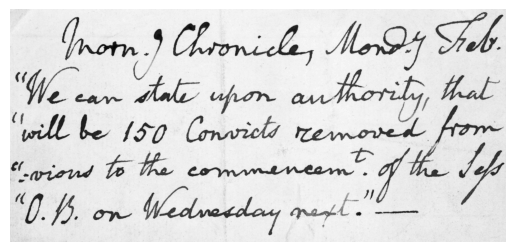

Formato: None
Dimensioni: (2675, 1255)
Modalità: L


In [187]:
# Select sample from dataset
sample = "01"
input_image_path = f"/Users/matteob/Library/CloudStorage/GoogleDrive-matteobernardi001@gmail.com/Il mio Drive/Image Processing/Datasets/Nostro Dataset/Sample{sample}.png"
img = Image.open(input_image_path).convert("L")  # Converte l'immagine in scala di grigi

plt.imshow(img, cmap='gray', aspect='equal')
plt.axis('off')
plt.show()

print("Dimensioni:", img.size)
print("Modalità:", img.mode)

In [188]:
img_array = np.array(img)

height, width = img_array.shape

# Compute the histogram
occorrenze = np.zeros(256, dtype=int)
for i in range(height):
    for j in range(width):
        index = img_array[i, j]
        occorrenze[index] += 1

prob = np.zeros(256)
min_flag = 1e6
T = 0

start_time = time.time()

# Minimize the objective function
for t in range(256):
    flag = otsukapur(occorrenze, prob, width, height, t)
    if flag < min_flag:
        min_flag = flag
        T = t
        # print(T)

print("Valore di soglia:", T)

# Binarize the image
binary_img = np.zeros_like(img_array, dtype=np.uint8)
binary_img[img_array > T] = 255
binary_img[img_array <= T] = 0

output = Image.fromarray(binary_img)
end_time = time.time()

computation_time = end_time - start_time
comp_per_pixel = computation_time / (height * width)

print(f"Tempo di esecuzione: {computation_time:.6f} secondi")
print("Dimensioni:", output.size)
print("Modalità:", output.mode)

# output.show()

N_e:  -26.68863199048862
0
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.68863199048862
N_e:  -26.7985110424697
28
N_e:  -27.01756826369306
29
N_e:  -27.52968032671621
30
N_e:  -27.648088299758275
31
N_e:  -27.9480871898279
32
N_e:  -28.198484012178675
33
N_e:  -28.24736768934906
34
N_e:  -28.392968011404495
35
N_e:  -28.61250415101328
36
N_e:  -28.723441133924226
37
N_e:  -28.706706

In [189]:
ouput_path = f"Output{sample}.png" 
output.save(ouput_path)

with open(f"Output/Global/Output{sample}_data.txt", "w") as file:
    file.write(f"Algoritmo Otsu-Kapur [Funzionante!]\n")
    file.write(f"Dimensioni: {output.size} \n")
    file.write(f"Valore di soglia: {T}\n")
    file.write(f"Tempo di esecuzione: {computation_time:.6f} secondi\n")
    file.write(f"Tempo di esecuzione per pixel: {comp_per_pixel:.6f} secondi\n")

Formato: None
Dimensioni: (2675, 1255)
Modalità: L
